<a href="https://colab.research.google.com/github/FLC-ML/raman-id/blob/master/Data%20Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Updated: Tuesday, 21 July 2020

Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Import Libraries

In [2]:
# import packages
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import numpy as np
import pandas as pd

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Load Data

In [3]:
# load data (specific to google drive)
X_test = np.load('/content/drive/My Drive/ML Group/Datasets/data/X_test.npy')
y_test = np.load('/content/drive/My Drive/ML Group/Datasets/data/y_test.npy')

X = np.load('/content/drive/My Drive/ML Group/Datasets/data/X_reference.npy')
y = np.load('/content/drive/My Drive/ML Group/Datasets/data/y_reference.npy')

X_fine = np.load('/content/drive/My Drive/ML Group/Datasets/data/X_finetune.npy')
y_fine = np.load('/content/drive/My Drive/ML Group/Datasets/data/y_finetune.npy')

print("X Reference Dataset Shape: ", X.shape)
print("y Reference Dataset Shape: ", y.shape)
print("X Test Dataset Shape: ", X_test.shape)
print("y Test Dataset Shape: ", y_test.shape)
print("X Finetuning Dataset Shape: ", X_fine.shape)
print("y Finetuning Dataset Shape: ", y_fine.shape)

X Reference Dataset Shape:  (60000, 1000)
y Reference Dataset Shape:  (60000,)
X Test Dataset Shape:  (3000, 1000)
y Test Dataset Shape:  (3000,)
X Finetuning Dataset Shape:  (3000, 1000)
y Finetuning Dataset Shape:  (3000,)


Smooth Data

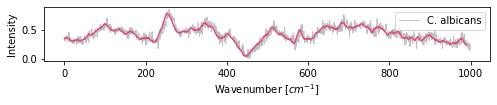

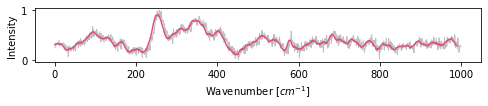

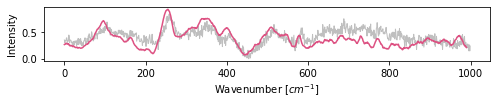

In [8]:
from numpy import convolve

def movingaverage (values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma
    
X_r = []    # Smoothed X_reference set
for i in X:
  x_new_r = movingaverage(i, 10)
  X_r.append(x_new_r)

X_f = []    # Smoothed X_finetune set
for i in X_fine:
  x_new_f = movingaverage(i, 10)
  X_f.append(x_new_f)

X_t = []   # Smoothed X_test set
for i in X_test:
  x_new_t = movingaverage(i, 10)
  X_t.append(x_new_t)
    
#Sample of Smoothing

plt.figure(figsize = (8,1))
plt.xlabel('Wavenumber [$cm^{-1}$]')
plt.ylabel('Intensity')
plt.plot(X[0], color = 'grey', linewidth = 1, alpha = 0.5, label = 'C. albicans')   #original X reference signal
plt.plot(X_r[0], color = '#dd5182', linewidth = 1.5)                              #smoothed X reference signal
plt.legend()
plt.show()

plt.figure(figsize = (8,1))
plt.xlabel('Wavenumber [$cm^{-1}$]')
plt.ylabel('Intensity')
plt.plot(X_fine[0], color = 'grey', linewidth = 1, alpha = 0.5)                   #original X finetuned signal
plt.plot(X_f[0], color = '#dd5182', linewidth = 1.5)                              #smoothed X finetuned signal
plt.show()

plt.figure(figsize = (8,1))
plt.xlabel('Wavenumber [$cm^{-1}$]')
plt.ylabel('Intensity')
plt.plot(X[0], color = 'grey', linewidth = 1, alpha = 0.5)                        #original X test signal
plt.plot(X_t[0], color = '#dd5182', linewidth = 1.5)                              #smoothed X test signal
plt.show()


Save Smoothed Datasets to 'ML Group'

In [9]:
np.save('/content/drive/My Drive/ML Group/Datasets/data/X_r.npy', X_r)
np.save('/content/drive/My Drive/ML Group/Datasets/data/X_f.npy', X_f)
np.save('/content/drive/My Drive/ML Group/Datasets/data/X_t.npy', X_t)